# Conditional Inference

In [1]:
%matplotlib inline
from __future__ import division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.sandbox.stats.runs as sssr
from scipy import optimize, stats

In [2]:
sns.set(color_codes=True)

## Estimating the Width of the Room Revised

_The unconditional analysis of the room width estimated by two groups of students in Chapter 3 led to the conclusion that the estimates in meters are slightly larger than the estimates in feet. Here, we reanalyze these data in a conditional framework._

In [3]:
roomwidth = pd.read_csv('roomwidth.csv')
del roomwidth['Unnamed: 0']
roomwidth.head()

,unit,width
0,metres,8
1,metres,9
2,metres,10
3,metres,10
4,metres,10


In [4]:
def convert(row):
    if row['unit'] == 'metres':
        row['width'] *= 3.28
    return row

roomwidth = roomwidth.apply(convert, axis=1)
roomwidth.head()

,unit,width
0,metres,26.24
1,metres,29.52
2,metres,32.80
3,metres,32.80
4,metres,32.80


In [5]:
feet = roomwidth['unit'] == 'feet'
metres = roomwidth['unit'] == 'metres'
T = roomwidth[feet]['width'].mean() - roomwidth[metres]['width'].mean()
T

-8.858893280632401

_In order to approximate the conditional distribution of the test statistic T we compute thousands of test statistics for shuffled $roomwidth$ values._

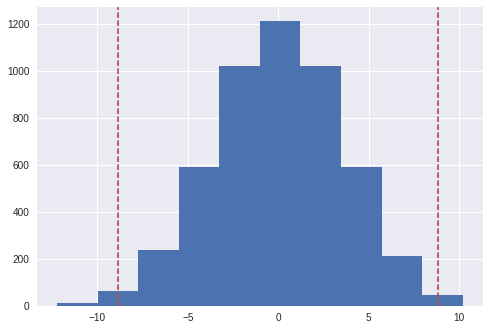

In [30]:
meandiffs = []
for idx in range(5000):
    sy = roomwidth.sample(n=len(roomwidth))
    sy = sy.reset_index()
    meandiffs.append(sy[feet]['width'].mean() - sy[metres]['width'].mean())
    
meandiffs = pd.Series(meandiffs)
meandiffs.hist()
plt.axvline(x=T, color='r', linestyle='dashed')
plt.axvline(x=-T, color='r', linestyle='dashed')
